# Installing required modules for the given task

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'


You should consider upgrading via the 'd:\notebooks\week2\catvsdog\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.0.0
certifi                      2021.10.8
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  2.0
fonttools                    4.33.3
gast                         0.5.3
google-auth                  2.6.6
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.0
h5py                         3.6.0
idna                         3.3
importlib-metadata           4.11.3
ipykernel                    6.13.0
ipython                      8.3.0
jedi                         0.18.1

You should consider upgrading via the 'd:\notebooks\week2\catvsdog\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Removing Dodgy Images

In [5]:
import cv2
import imghdr

In [60]:
data_dir = 'cats_and_dogs'

In [61]:
image_exts = ['jpeg','jpg']

In [62]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Data Preparation

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [63]:
data = tf.keras.utils.image_dataset_from_directory('cats_and_dogs')

Found 23491 files belonging to 2 classes.


**You can find the data at https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset**

In [64]:
data_iterator = data.as_numpy_iterator()

In [67]:
batch = data_iterator.next()

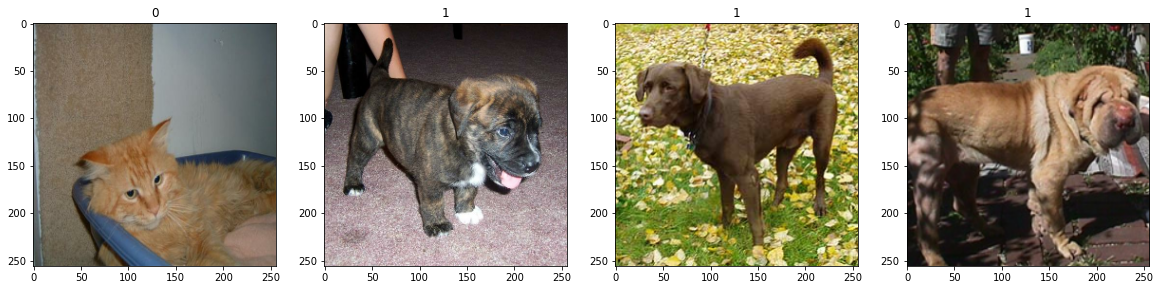

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

    ax[idx].title.set_text(batch[1][idx])

**1 - dog while 0 - cat**

# Scaling Data

In [69]:
data = data.map(lambda x,y: (x/255, y))

In [70]:
data.as_numpy_iterator().next()

(array([[[[7.92156875e-01, 8.19607854e-01, 8.43137264e-01],
          [7.92156875e-01, 8.19607854e-01, 8.43137264e-01],
          [7.94722736e-01, 8.22173715e-01, 8.45703125e-01],
          ...,
          [1.35125607e-01, 1.11596204e-01, 1.24571078e-01],
          [1.29817709e-01, 1.11052386e-01, 1.11749388e-01],
          [7.57199749e-02, 6.00337014e-02, 5.61121330e-02]],
 
         [[7.95756757e-01, 8.23207736e-01, 8.46737146e-01],
          [7.95756757e-01, 8.23207736e-01, 8.46737146e-01],
          [7.95967281e-01, 8.23418260e-01, 8.46947670e-01],
          ...,
          [1.49257943e-01, 1.25728533e-01, 1.38703406e-01],
          [1.34190992e-01, 1.15425676e-01, 1.16122678e-01],
          [8.60485286e-02, 7.03622550e-02, 6.64406866e-02]],
 
         [[7.99463868e-01, 8.26914847e-01, 8.50444257e-01],
          [8.00792873e-01, 8.28243852e-01, 8.51773262e-01],
          [8.02849293e-01, 8.30300272e-01, 8.53829682e-01],
          ...,
          [1.34135947e-01, 1.10606536e-01, 1.1681

# Splitting the data

In [71]:
len(data)

735

In [72]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [73]:
test_size+val_size+train_size

735

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building the model

In [49]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers

In [104]:
# This model has the given configurations for week 2
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [106]:
history = model.fit(train,
                    epochs=20,
                    batch_size=25,
                    validation_data=val)

Epoch 1/20
514/514 [==============================] - 72s 138ms/step - loss: 0.7205 - acc: 0.4997 - val_loss: 0.6994 - val_acc: 0.5022
Epoch 2/20
514/514 [==============================] - 70s 136ms/step - loss: 0.7033 - acc: 0.4996 - val_loss: 0.6941 - val_acc: 0.5011
Epoch 3/20
514/514 [==============================] - 71s 137ms/step - loss: 0.6980 - acc: 0.5001 - val_loss: 0.6936 - val_acc: 0.4990
Epoch 4/20
514/514 [==============================] - 71s 138ms/step - loss: 0.6965 - acc: 0.5002 - val_loss: 0.6938 - val_acc: 0.4955
Epoch 5/20
514/514 [==============================] - 71s 138ms/step - loss: 0.6957 - acc: 0.5003 - val_loss: 0.6937 - val_acc: 0.4980
Epoch 6/20
514/514 [==============================] - 71s 138ms/step - loss: 0.6951 - acc: 0.5001 - val_loss: 0.6937 - val_acc: 0.4968
Epoch 7/20
514/514 [==============================] - 71s 137ms/step - loss: 0.6947 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.4970
Epoch 8/20
514/514 [==============================] - 7

# Plotting the performance of the model

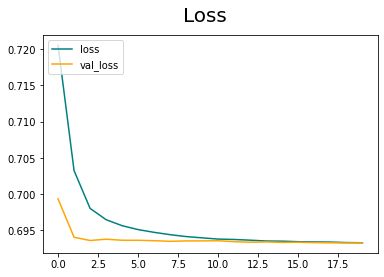

In [107]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

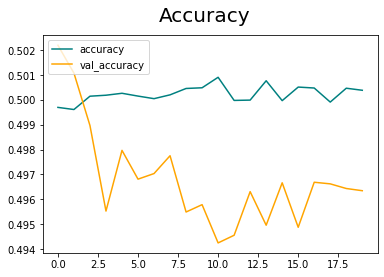

In [110]:
fig = plt.figure()
plt.plot(history.history['acc'], color='teal', label='accuracy')
plt.plot(history.history['val_acc'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**The model doesn't capture anything in the dataset. I think it's because the way the data handled in preprocessing is different compared to the instructions shown in the video so i made another model that can capture the given data features**

# Another Model

In [97]:
model = models.Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer='l2'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 16)      

# Training the model

In [99]:
logdir='logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
514/514 [==============================] - 39s 74ms/step - loss: 0.7990 - accuracy: 0.5624 - val_loss: 0.6859 - val_accuracy: 0.6001
Epoch 2/15
514/514 [==============================] - 38s 73ms/step - loss: 0.6807 - accuracy: 0.6249 - val_loss: 0.6739 - val_accuracy: 0.6252
Epoch 3/15
514/514 [==============================] - 38s 73ms/step - loss: 0.6370 - accuracy: 0.6848 - val_loss: 0.5875 - val_accuracy: 0.7295
Epoch 4/15
514/514 [==============================] - 39s 75ms/step - loss: 0.5929 - accuracy: 0.7170 - val_loss: 0.5646 - val_accuracy: 0.7470
Epoch 5/15
514/514 [==============================] - 37s 72ms/step - loss: 0.5621 - accuracy: 0.7462 - val_loss: 0.5758 - val_accuracy: 0.7468
Epoch 6/15
514/514 [==============================] - 37s 72ms/step - loss: 0.5443 - accuracy: 0.7553 - val_loss: 0.5556 - val_accuracy: 0.7525
Epoch 7/15
514/514 [==============================] - 39s 75ms/step - loss: 0.5262 - accuracy: 0.7695 - val_loss: 0.5606 - val_accuracy:

# Plotting the performance

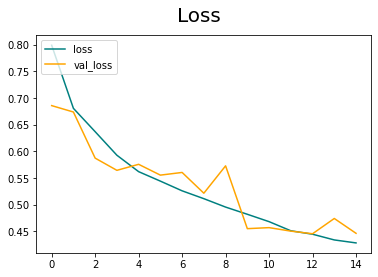

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

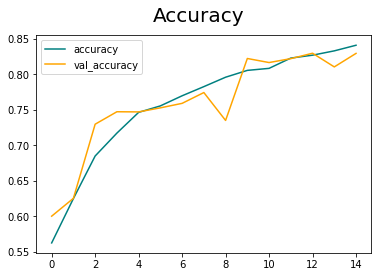

In [103]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()